# Исследовательский анализ данных


## Первые графики и выводы

1. <a href="#0">Введение</a>
2. <a href="#1">Знакомство с задачей</a>
3. <a href="#2">Сводные таблицы для расчёта среднего</a>
4. <a href="#3">Применяем сводные таблицы</a>
5. <a href="#4">Есть ли проблемы в данных?</a>
6. <a href="#5">Базовая проверка данных</a>
7. <a href="#6">Гистограмма</a>
8. <a href="#7">Гистограмма для двух кубиков</a>
9. <a href="#8">Распределения</a>
10. <a href="#9">Диаграмма размаха</a>
11. <a href="#10">Диаграмма размаха в Python</a>
12. <a href="#11">Описание данных</a>
13. <a href="#12">Заключение</a>

Добро пожаловать в IV раздел по исследовательскому анализу данных.

На подготовительном этапе графики нужны для оценки качества данных, а затем — для выдвижения гипотез, поисков закономерностей и подкрепления ваших выводов в отчётах.

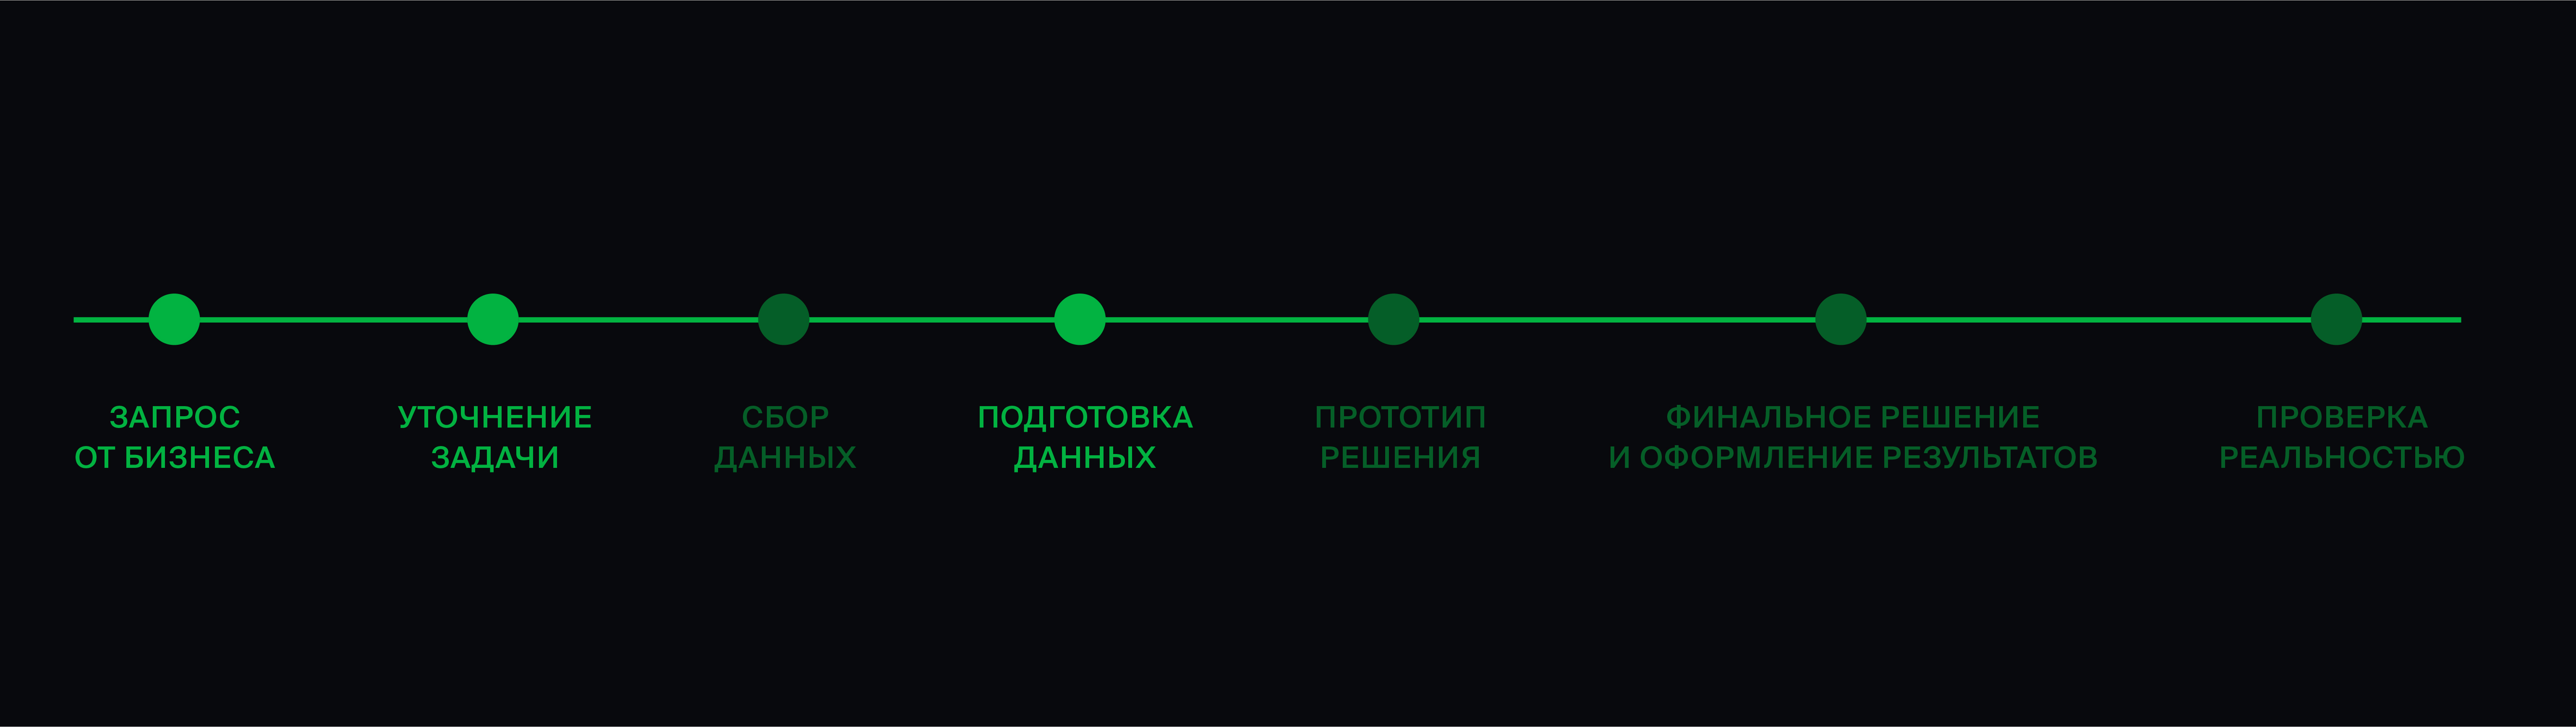

**Ваши цели:**

- научиться работать с инструментами для построения графиков: `hist()`, `boxplot()`, `plot()`;
- научиться делать срезы данных;
- изучить метод `join()` для объединения таблиц и повторить метод `merge()`;
- разобраться, как определять и интерпретировать взаимосвязи различных данных;
- научиться автоматизировать процесс построения набора графиков.

Перед вами кейс от команды Яндекс.Навигатора. Недавно Яндекс запускал сервис оплаты заправки на АЗС из Яндекс.Навигатора — водители оплачивают бензин через приложение, не выходя из машины. Повторите путь наших аналитиков. Вернитесь на стадию анализа рынка для сервиса онлайн-оплаты заправки и оцените среднее время, которое водители проводят на АЗС. 

Подготовьте список потенциальных партнёров — крупных сетей АЗС.

 Вам пригодятся знания по работе с объединением таблиц из прошлого курса. Вы также изучите новые методы работы с датами.


<a name="0">_</a>
## Введение
Работа аналитика — не только сами расчёты, но и поиск необычных явлений, артефактов и ошибок в данных. Помогают построение и анализ графиков: визуальное представление позволяет буквально заглянуть в данные, обнаружить проблемы и сделать выводы. Часто неожиданные. Такие непредвиденные открытия могут принести едва ли не больше пользы, чем решение первоначальной задачи.

Чему вы научитесь:

- Строить гистограммы методом `hist()` и диаграммы размаха методом `boxplot()`;
- Определять типы распределений: нормальное и Пуассона;
- Получать числовое описание данных методом `describe()`

Лишних понятий, которые потом не пригодятся, в курсе Практикума нет: любой неотвеченный вопрос встанет заново в следующей теме. Каждая новая тема — развитие предыдущей.

**Постановка задачи:**

Оцените данные о заправках. Проведите базовую проверку и постройте ваши первые графики.

<a name="1">_</a>
## Знакомство с задачей

Как исследовать поведение водителей на заправках, если вы — Яндекс? Обратиться к статистике Яндекс.Навигатора: узнать, на какую именно заправку заезжал водитель и сколько времени там провёл.

Ваши коллеги из Навигатора собрали необходимые данные и прислали их в таком виде:

- Зашифрованное наименование сети АЗС (столбец name): вместо брендов — названия растений;
- Уникальный идентификатор конкретной АЗС (столбец id) — в сети их много;
- Время заезда на АЗС (столбец date_time) в формате ISO: 20190405T165358 означает, что водитель прибыл на заправку 5 апреля 2019 года в 16 часов 53 минуты 58 секунд по UTC.
- Проведённое на АЗС время (столбец time_spent) в секундах.

Нужно ответить на вопрос, сколько в среднем времени тратят водители на заправку в каждой из сетей АЗС.

In [2]:
# Выведем первые строки таблицы методом head()

import pandas as pd
data = pd.read_csv('../datasets/visits.csv')
print(data.head()) 

             date_time\tid\ttime_spent\tname
0   20180406T165358\t76144fb2\t98.0\tВасилек
1   20180404T173913\t76144fb2\t15.0\tВасилек
2  20180403T172824\t76144fb2\t220.0\tВасилек
3   20180407T070441\t76144fb2\t19.0\tВасилек
4   20180404T132049\t76144fb2\t14.0\tВасилек


Вот и первая проблема. Данные склеились в одну строку вместо того, чтобы разбиться по колонкам. Это произошло **из-за разделителей в формате csv**. Напомним, что csv — это Comma-Separated Values, или значения, разделённые запятыми. Действительно, в прошлых уроках вы работали с таблицами, где строку на колонки делили запятые. Однако вместо них могут быть точки с запятой, знаки табуляции или другие символы. Могут вносить путаницу и десятичные дроби, записанные с запятой.

Какими символами разделять колонки и дроби, указывают в параметрах функции `read_csv()`. Разделитель колонок задают параметром sep (от англ. separate, «отделять, разделять»), а дробей — параметром decimal (англ. «десятичная дробь»):

 `file = pd.read_csv('file.csv', sep=';', decimal=',')`

16 ноября 1974 года пуэрториканская обсерватория Аресибо отправила в космос радиосигнал, вошедший в историю под названием «Послание Аресибо».

Это адресованная инопланетянам информация, записанная двоичным кодом: числа от 1 до 10; химические элементы; строение и форма ДНК; количество людей на Земле, их средний рост и эскиз устройства человека; описание Солнечной системы; сведения об обсерватории Аресибо. Фрагмент послания выглядит так:
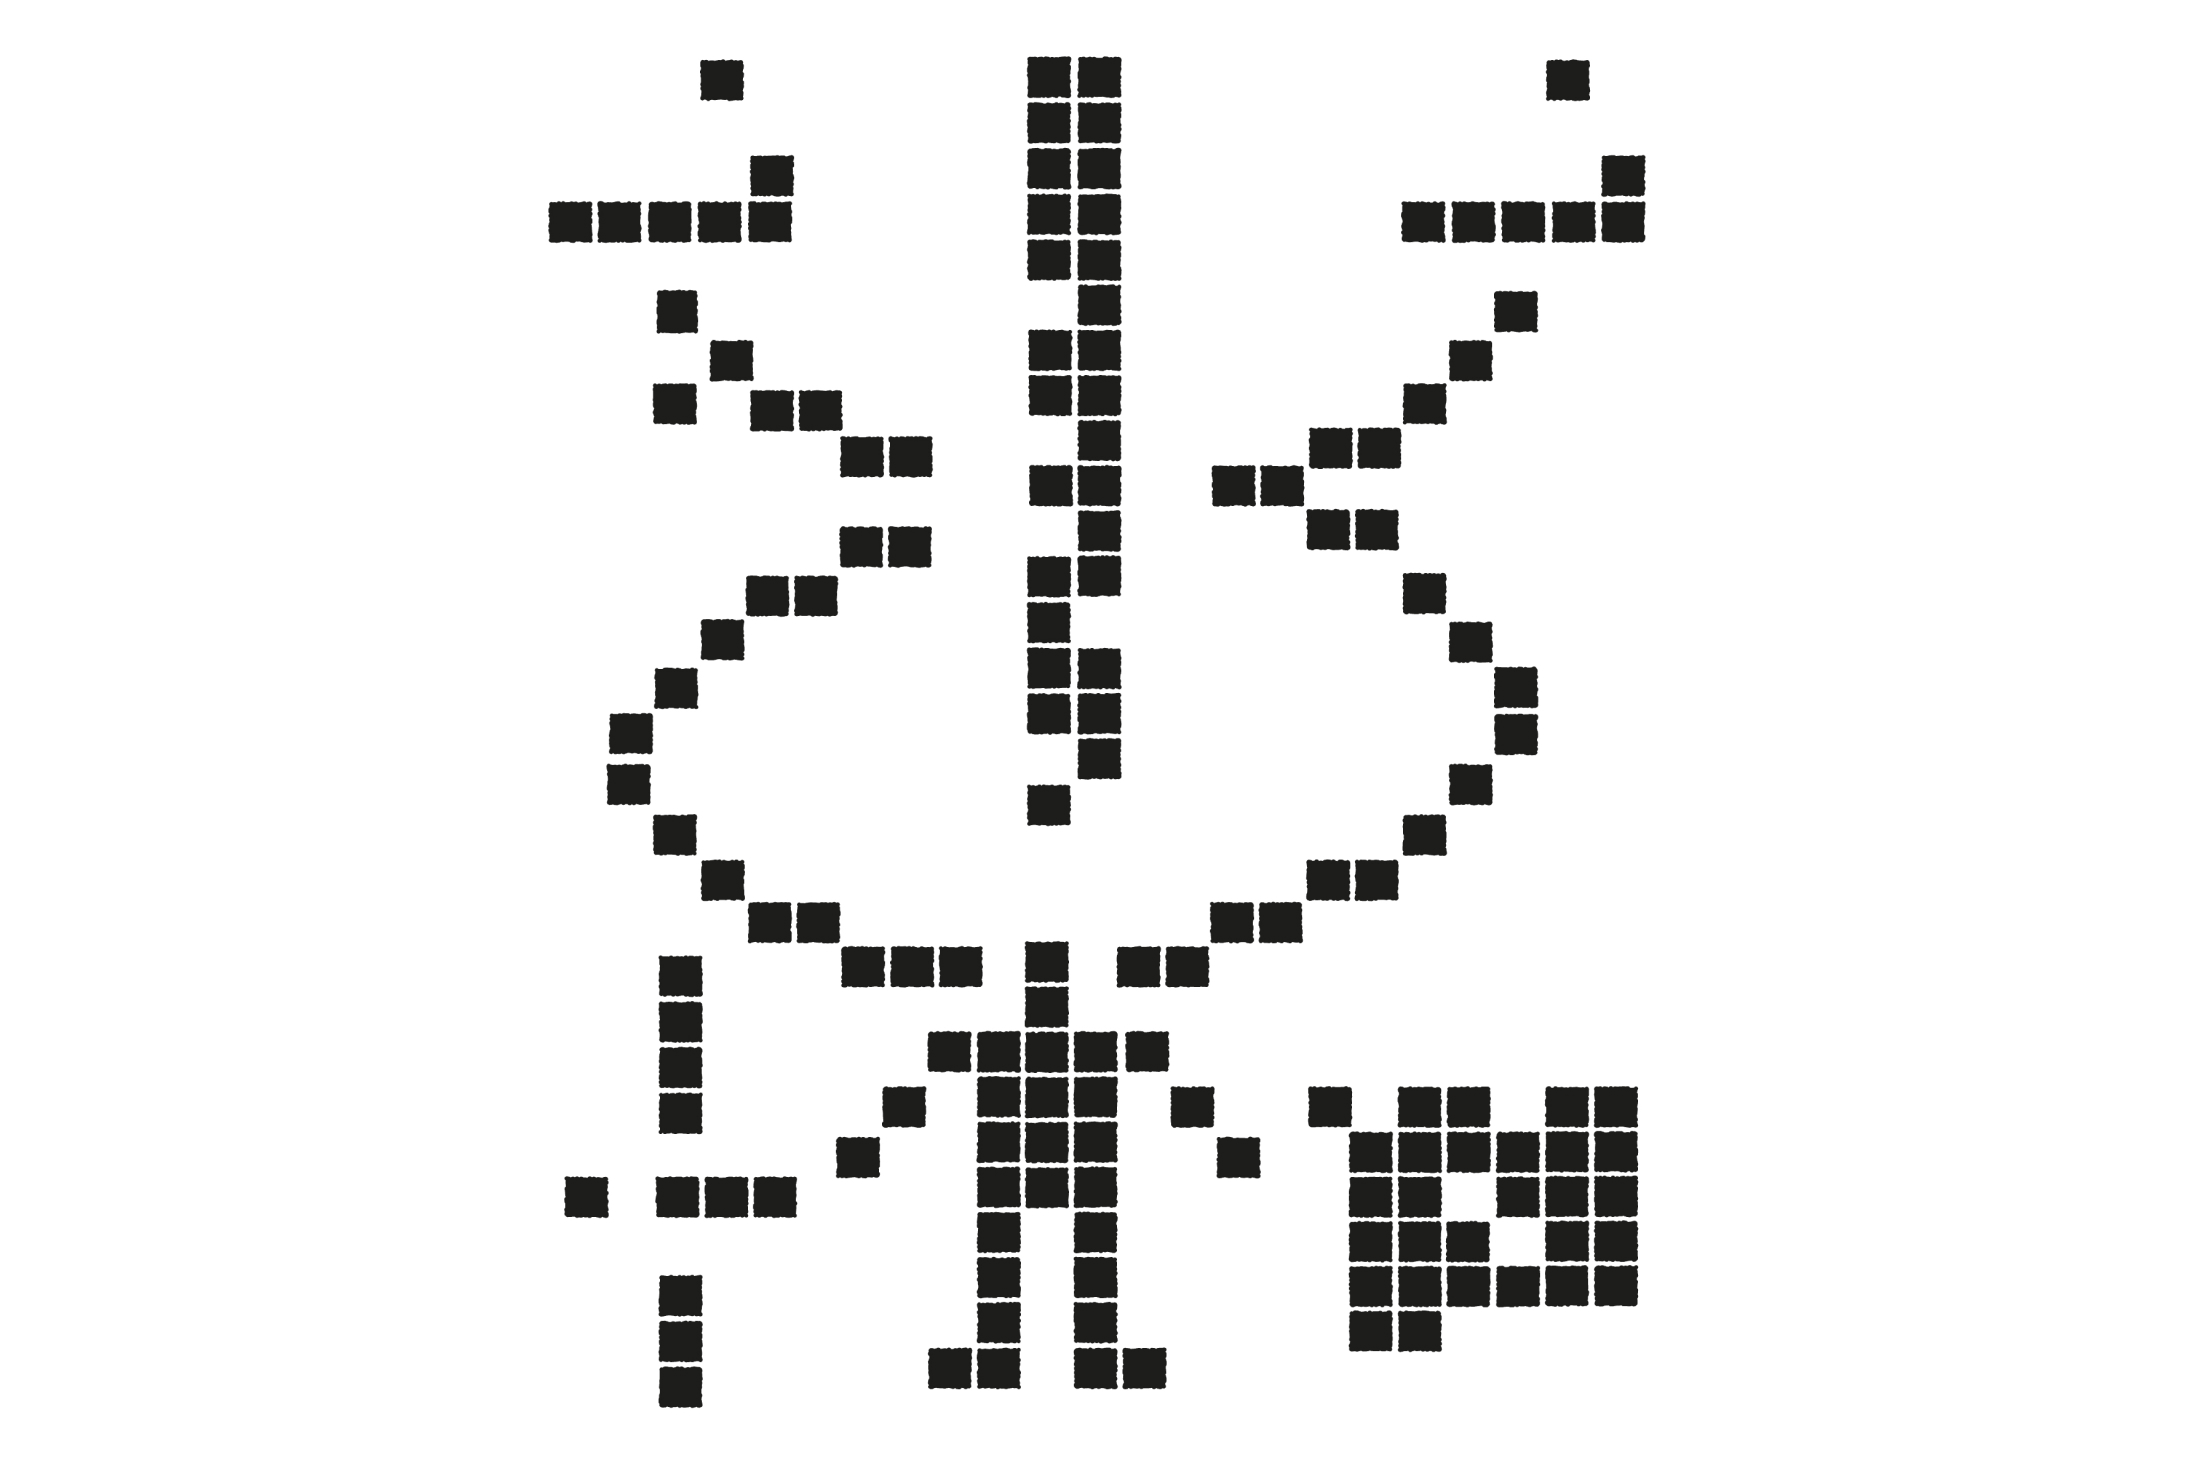

Само послание — последовательность нулей и единиц. Для расшифровки нужно разбить её на 73 строки по 23 символа. Вызовем функцию `read_csv()` — обратите внимание, что ей можно «скормить» файл в формате txt, — и прочитаем послание Аресибо:

In [3]:
arecibo = pd.read_csv('../datasets/arecibo.txt')
print(arecibo.head()) 

   00000010101010000000000
0  00101000001010000000100
1  10001000100010010110010
2  10101010101010100100100
3  00000000000000000000000
4  00000000000011000000000


Послание выглядит совсем не так, как нам хотелось. Разделитель — обратный слеш `'\'`. В Python один обратный слеш `'\'` используют для команд, например, `'\n'` — перевод строки. Чтобы не перепутать, пишут двойной: `'\\'`. 

Прочитаем послание ещё раз с учётом разделителя столбцов:

In [4]:
arecibo = pd.read_csv('../datasets/arecibo.txt', sep='\\')
print(arecibo.head()) 

   00000010101010000000000
0  00101000001010000000100
1  10001000100010010110010
2  10101010101010100100100
3  00000000000000000000000
4  00000000000011000000000


Теперь единицы и нули строка за строкой можно превратить в квадратики, которые прочтут инопланетяне. А мы возвращаемся из дальнего космоса на бензоколонку.

### Задача
Прочитайте файл `visits.csv`, указав как разделитель знак табуляции: `'\t'`, и сохраните результат в датафрейме data. Выведите  первые пять строк.
Путь к файлу: /datasets/visits.csv
>Добавьте функции `read_csv()` параметр `sep='\t'`. Первые 5 строк выведите методом `head()`.

In [5]:
import pandas as pd
import numpy as np

In [6]:
data = pd.read_csv('../datasets/visits.csv', sep='\t')
data.head()

,date_time,id,time_spent,name
0,20180406T165358,76144fb2,98.0,Василек
1,20180404T173913,76144fb2,15.0,Василек
2,20180403T172824,76144fb2,220.0,Василек
3,20180407T070441,76144fb2,19.0,Василек
4,20180404T132049,76144fb2,14.0,Василек


<a name="2">_</a>
## Сводные таблицы для расчёта среднего
Нужно узнать, сколько времени в среднем водители тратят на заправку в каждой сети АЗС. В каждой строке датафрейма есть название сети и время, проведённое на АЗС. Занимаясь предобработкой данных, вы применяли pivot_table() — метод для построения сводных таблиц.

Напомним его аргументы:

- `index` — столбец, значения которого становятся названиями строк (индексом);
- `columns` — столбец, значения которого становятся названиями столбцов;
- `values` — значения, по которым вы хотите увидеть сводную таблицу;
- `aggfunc` — функция, применяемая к значениям.
Прежде значением `aggfunc` вы указывали `sum`, то есть складывали элементы столбца. Если параметр `aggfunc` не указывать, то по умолчанию метод `pivot_table()` рассчитает среднее арифметическое значений, указанных в параметре `values`.

Проанализируем среднюю посещаемость домашних матчей команд Национальной Хоккейной Лиги, начиная с сезона 2000-2001 года и заканчивая сезоном 2017-2018 года. Прочитаем первые 5 строк таблицы, где для каждой команды указано количество домашних матчей и их суммарная посещаемость:

In [7]:
nhl_att = pd.read_excel('../datasets/nhl_attendance.xlsx')
print(nhl_att.head(10))

    SEASON  RANK          TEAM  HOME GAMES  HOME ATTENDANCE  ROAD GAMES  \
0  2017-18     1       Chicago          41           887794          41   
1  2017-18     2      Montreal          41           873283          41   
2  2017-18     3  Philadelphia          41           800214          41   
3  2017-18     4       Detroit          41           800115          41   
4  2017-18     5       Toronto          41           786677          41   
5  2017-18     6     Tampa Bay          41           782772          41   
6  2017-18     7     Minnesota          41           780501          41   
7  2017-18     8       Calgary          41           775105          41   
8  2017-18     9    Washington          41           769756          41   
9  2017-18    10    Pittsburgh          41           761764          41   

   ROAD ATTENDANCE  TOTAL GAMES  TOTAL ATTENDANCE  
0           723773           82           1611567  
1           733736           82           1607019  
2           702781

Найдём среднюю посещаемость домашних матчей для команды:

Посчитаем среднюю сезонную посещаемость матчей. Эта метрика поможет проанализировать, насколько успешен был тот или иной сезон:

Какие выводы можно сделать, прочитав эту таблицу?
- Наибольшая средняя посещаемость матчей была в сезоне 2012-2013 гг.
- Можно наблюдать тренд к снижению средней посещаемости с сезона 2012-2013 гг.
- Начиная с сезона 2007-2008 гг. средняя посещаемость не была ниже 17 000 зрителей
- **Всё вышеперечисленное верно**

<a name="3">_</a>
## Применяем сводные таблицы
Наибольшая средняя посещаемость матчей была в 2012-2013 годах. Примечательно, что в тот сезон состоялось только 48 игр вместо традиционных 82. (Недостачу вызвали трудовые споры между руководством лиги и профсоюзом хоккеистов).

Начиная с сезона 2007-2008 года средняя посещаемость никогда не была ниже 17_000 зрителей. Значит, маркетинг лиги работает.
Наконец, в последние сезоны наблюдался тренд к снижению средней посещаемости. Это может быть связано с тем, что некоторые команды стали играть на малых стадионах.

Суровый бой ведёт ледовая дружина, а мы застряли на АЗС.

### Задача
Посчитайте среднее время заправки в секундах (`'time_spent'`) для каждой из сетей (`'name'`), применяя метод `pivot_table()`. Датафрейм сохраните в переменной `name_stat` и выведите на экран.
>Название колонки значений, которые мы хотим усреднять, передаётся в параметре `values`. Название колонки, по которой мы будем группировать значения, передаётся в параметре `index` (эти значения станут индексом в результирующем датафрейме).

In [8]:
name_stat = data.pivot_table(index='name', values='time_spent')
print(name_stat) 

             time_spent
name                   
Агератум     337.802721
Амарант      132.760012
Аммобиум     256.708042
Арктотис      73.879984
Астильба     376.143149
Бальзамин    134.508411
Бархатцы     145.300328
Бегония      163.200647
Белоцветник  100.818966
Василек      268.849897
Вербена      190.016594
Вероника     220.019402
Гацания      160.685185
Гвоздика     294.317308
Гейхера      167.445947
Гелихризум   290.138643
Георгина     166.615555
Годеция      113.958333
Диморфотека  406.161017
Доротеантус  263.568916
Ирис         179.931159
Календула    207.357323
Колокольчик  119.131564
Космос       164.867797
Крокус       349.031746
Лаватера     249.992844
Левкой       187.465606
Лобулярия     96.834350
Люпин        235.440937
Малопа        76.070543
Мальва       136.562234
Нарцисс       68.166758
Настурция    154.859694
Незабудка    120.362398
Немезия      186.535207
Обриета      141.777778
Петуния      265.780822
Пион         222.565523
Подснежник   180.286207
Роза         260

<a name="4">_</a>
## Есть ли проблемы в данных?
Таблицу, полученную в прошлом уроке, нельзя показывать менеджерам: они всё равно не поверят!

Сети АЗС «Нарцисс», «Арктотис» и «Малопа» имеют среднее время заправки около 70 секунд. Неправдоподобно мало.

Как вы думаете, всё ли в порядке с данными?
- Всё правильно посчитано, в результатах не может быть ошибки
- **Всё может быть. Нужно проверить и данные, и расчёты**
- Поищем ошибку в расчётах
- Наверное, нам прислали неправильные данные

<a name="5">_</a>
## Базовая проверка данных
В работе с данными почти всегда вас ждут сюрпризы
- Почему-то выгрузили не те данные, или не всё, что есть;
- Ошибки в алгоритмах, считающих заезды: скажем, время заправки учли неверно.
- Не тот формат; например, вместо секунд записали минуты.
- Упущен какой-нибудь существенный факт. Так, водители могли заехать на нерабочую АЗС (а счётчик их учёл) и развернуться, не заправившись (счётчик зафиксировал очень короткое время).

Словом, в данных может быть всё, что угодно. Именно вы как аналитик ручаетесь за их реалистичность. Попробуйте оценить, насколько они достоверны. Начните с базовых проверок. Например, несложно ответить на вопросы:
- Сколько всего заездов зафиксировано за время исследования?
- Сколько АЗС?
- Сколько заездов на одну АЗС в день?
- Какие сети АЗС самые популярные?

... и самостоятельно либо с помощью коллег оценить, похожи ли результаты ваших расчётов на правду.

Базовая проверка может обнаружить проблему в данных. Или наоборот — свидетельствовать, что с ними всё в порядке. По крайней мере, пока.

### Задача 1/5
Сколько было заездов на АЗС? Сохраните число строк датафрейма в переменной `total_visits`. Результат выведите на экран так:

`Количество заездов: ...`
>Методом `len()` или атрибутом `shape[0]` получите количество строк.

In [9]:
# Row count with count()
total_visits = data['id'].count()
print('Количество заездов:', total_visits)

Количество заездов: 317104


In [10]:
# Row count with shape[0]
print('Количество заездов:', data.shape[0])

Количество заездов: 317104


In [11]:
# Row count with len()
print('Количество заездов:', len(data.index))

Количество заездов: 317104


Насколько это число реалистично? С чем можно его соотнести? Можно посчитать среднее количество заездов на одну АЗС в день.

Найдем число АЗС и число дней, для которых есть данные.


### Задача 2/5
Найдите количество охваченных исследованием АЗС. Сохраните его в переменной `total_stations`, результат на экран выведите так:

`Количество АЗС: ... `

Не удаляйте вывод из предыдущего задания. Идентификаторы АЗС записаны в столбце `id`.
>К значениям столбца `['id']` примените метод `unique()`. Посчитайте уникальные АЗС методом `len()`.

In [12]:
total_stations = len(data['id'].unique())
print('Количество АЗС:', total_stations)


Количество АЗС: 471


In [13]:
# тот же результат
total_stations = data['id'].value_counts()
total_stations = len(total_stations)
print('Количество АЗС:', total_stations)

Количество АЗС: 471


### Задача 3/5
Выведите на экран дату и время первого и последнего заезда на АЗС через пробел. Без объявления новых переменных, примените методы `min()` и `max()` к значениям столбца `data['date_time']` в аргументе функции `print()`.
Вывод должен выглядеть так: `20180402T000008 20180408T235957`.
>Примените метод `min()` к значениям столбца `"date_time"`, чтобы получить первый заезд. `max()` — чтобы получить последний. Перечислите полученные значения в функции `print()` через запятую.

In [14]:
print(data["date_time"].min(), data["date_time"].max())

20180402T000008 20180408T235957


Наблюдения происходили с 20180402T000008 по 20180408T235957. Сколько это дней?

### Задача 4/5
Данные собраны за 7 дней — сохраните это значение в переменной `total_days`.
Найдите среднее число заездов на одну АЗС за 1 день. Сохраните результат вычислений в переменной `station_visits_per_day` и выведите её на экран в следующем виде:

`Количество заездов на АЗС в сутки: ... `
>Поделите количество заездов на количество АЗС, а затем и на дни.

In [15]:
total_days = 7
station_visits_per_day = total_visits / total_stations / total_days
print('Количество заездов на АЗС в сутки:', station_visits_per_day)

Количество заездов на АЗС в сутки: 96.17955717318775


Почти 100 заездов на АЗС в день. Похоже ли это на правду? Предположим, что на АЗС заправляется от 1 до 5 машин в минуту, ночью меньше. Возьмем среднюю оценку: 1 машина в минуту - это 1440 заездов всутки. Выходит, с включенным Яндекс.Навигатором на заправку заезжает меньше 10% водителей. Тогда число заездов 100 кажется близким к истине. С объемом данных все в порядке.

### Задача 5/5
Проверьте распределение числа заездов по сетям АЗС. Распечатайте топ-10 сетей с наибольшим числом заездов. В каждой строке должно быть название сети и число заездов.
Результат выведите в функции print().
>К столбцу `'name'` примените `value_counts()`. Отсортируйте полученные значения по убыванию методом `sort_values()` с параметром `ascending=False`. Топ-10 сетей распечатайте, вызвав head(10).

In [16]:
print(data["name"].value_counts().sort_values(ascending=False).head(10))

Календула      85648
Василек        79006
Георгина       34356
Немезия        20138
Колокольчик    18835
Мальва         17386
Гейхера        14125
Доротеантус     6312
Нарцисс         3640
Амарант         3221
Name: name, dtype: int64


Эксперты рынка АЗС подтвердили, что сети "Календула"и "Василек" - крупнейшие игроки. Другие сети, по словам специалистов, также распределились правдоподобно.
Разбираемся дальше.

<a name="6">_</a>
## Гистограмма
На первый взгляд, данные выглядят корректно.

Однако есть гипотеза, что продолжительность заправки посчитана неверно: в некоторых сетях это время выглядит неправдоподобно маленьким. Напомним, вы считали среднее арифметическое. Оно не означает, что столько времени заправляются все водители: кто-то больше, кто-то меньше. Как представить себе значения, из которых рассчитано среднее, если в таблице тысячи строк? Не просматривать же каждую. Для ответа на этот вопрос строят гистограмму.

Гистограмма — это график, который показывает, как часто в наборе данных встречается то или иное значение. Гистограмма объединяет числовые значения по диапазонам, то есть считает частоту значений в пределах каждого интервала. Её построение подобно работе знакомого вам метода `value_counts()`, подсчитывающего количество уникальных значений в списке. `value_counts()` группирует строго одинаковые величины и хорош для подсчёта частоты в списках с категориальными переменными.

Сравним гистограмму с результатом работы метода `value_counts()`.

«Симпсоны» — знаменитый американский мультсериал. Он пережил уже 30 сезонов и 662 эпизода, что сделало его самым популярным мультсериалом современности. «Симпсоны» дважды вошли в Книгу рекордов Гиннесса: как самый длинный ситком в истории и как телевизионный сериал с наибольшим количеством приглашённых звёзд.

В датасете информация об эпизодах «Симпсонов»: название, дата выхода на экран, сезон, номер в сезоне и рейтинг. Стоит ли авторам и продюсерам сериала готовить новый, 31-й сезон?

Поможем команде принять решение. Найдём рейтинг эпизодов сериала в прошлом.

In [17]:
simpsons = pd.read_csv('../datasets/simpsons.csv')
print(simpsons.head())

   laranja_camisa_bart  azul_calcao_bart  azul_sapato_bart  marrom_boca_homer  \
0             6.886102          3.495204          1.484984           0.000000   
1             5.004901          3.183889          1.000142           0.000000   
2             5.264620          5.029683          0.283567           0.000000   
3             0.000000          0.000000          0.000000           0.480168   
4             8.978929          3.459119          0.000000           0.000000   

   azul_calca_homer  cinza_sapato_homer classe  
0               0.0            0.062954   Bart  
1               0.0            0.033024   Bart  
2               0.0            0.151573   Bart  
3               0.0            0.021164   Bart  
4               0.0            0.011593   Bart  


Применим метод `value_counts()`:

Ай, карамба! Такое представление данных никак не убедит продюсеров продолжать работу над «Симпсонами». Построим гистограмму и увидим, какие оценки сериал получал чаще всего:
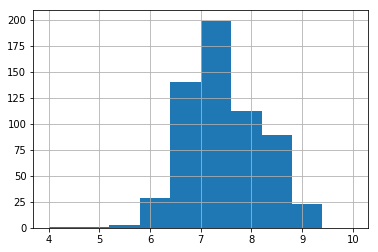

Чаще всего эпизоды получали оценки в районе 7 баллов и выше. Это очень хороший показатель для сериала. Show must go on: 31, а с ним и 32 сезонам быть!

В Pandas гистограмму строит специальный метод `hist()` (от англ. histogram — «гистограмма»). Применять его можно к списку или к столбцу датафрейма: во втором случае название столбца передаётся в параметре. Метод `hist()` находит в наборе чисел минимальное и максимальное значения, а полученный диапазон делит на области или корзины. Затем `hist()` считает, сколько значений попало в каждую корзину, и отображает это на графике.

Параметр `bins` (англ. «корзины, вёдра») определяет, на сколько областей делить диапазон данных. По умолчанию таких «корзин» 10.

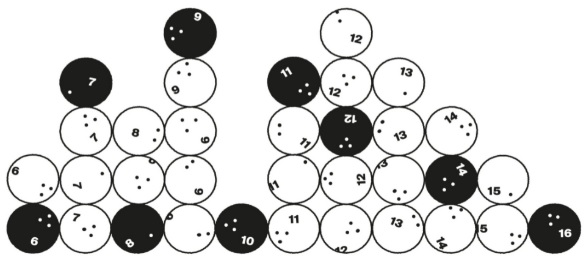
Построим гистограмму, отображающую количество шаров в боулинге. Допустим, у нас по одному шару каждого номера от 6 до 16:


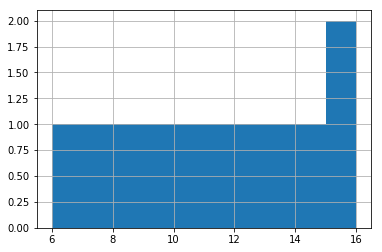
Хотя на каждый номер приходится 1 шар, гистограмма не похожа на прямоугольник. Это потому, что по умолчанию параметр bins=10, а шаров 11. Передадим соответствующее число корзин и взглянем на полученный график:

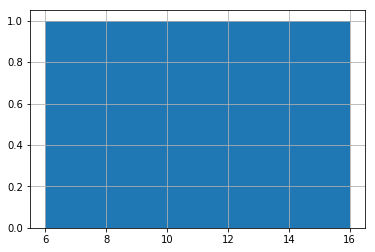
Теперь гистограмма соответствует действительности. Что если количество шаров с разными номерами изменится? Скажем, будет два шара под номером 8 и ни одной «семёрки»?


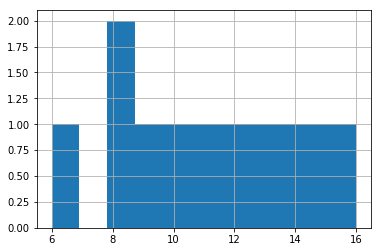
Провал там, где должно быть значение 7. Частота появления восьмёрки увеличилась вдвое. График выглядит правдоподобно.
Что произойдёт, если в данных шестнадцатый шар вдруг станет шаром под номером 100, а пятнадцатый пропадёт вовсе?

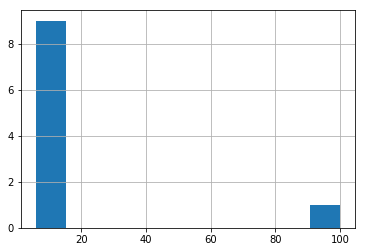
9 шаров со значениями в диапазоне от 5 до 15 и 1 шар с номером от 90 до 100. При таком изображении не видно тонких особенностей распределения значений в диапазоне от 5 до 15 — того, что в нём нет семёрки, а восьмёрок пара.
Вернём детальность, увеличив число корзин до 100.

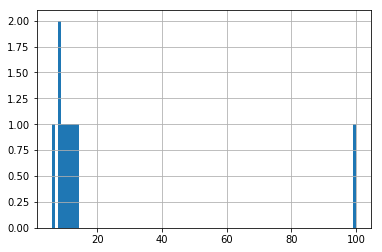
На этом графике видно, что восьмёрка удвоена, а семёрка не встречается вовсе. Увеличив число корзин, мы вернули детализацию, однако гистограмма всё ещё не наглядна. 100 слишком похоже на выброс — значение, сильно отличающееся от других элементов в наборе данных.

Изменим масштаб вручную, указав диапазон значений, по которым следует строить график. Границы интересующего нас интервала указывают в параметре **range** (англ. «диапазон»): `range=(min_value, max_value)`. Нам нужна область от 6 до 14:

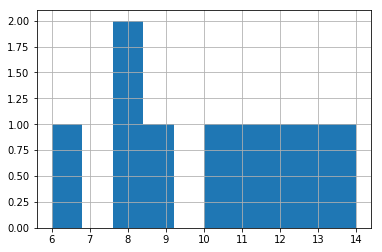
Гистограмма даёт представление о структуре данных. В частности, по ней можно понять, откуда взялось такое среднее арифметическое.

Вот 2 ряда по 10 чисел: их гистограммы очень разные, а среднее у обеих 5.

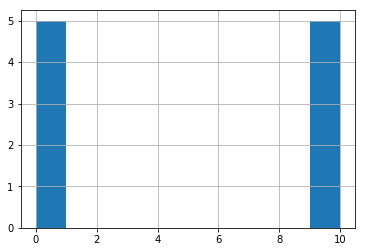

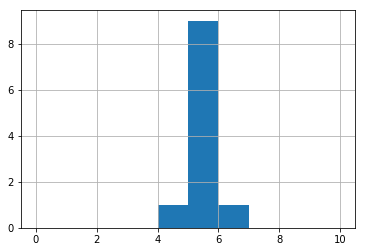

Если бы мы смотрели только на среднее значение этих наборов данных, то сказали бы, что они очень похожи. Однако описывающие их гистограммы дают понять, что это два очень разных явления.

Пора применить гистограмму к реальной задаче. Напомним, что средняя продолжительность заправки выглядит неправдоподобно малой.

### Задача 1/3
Выведите гистограмму значений времени, проведённого на АЗС.
>Примените к датафрейму метод `hist()`, передав в качестве параметра столбец `'time_spent'`.

array([[<AxesSubplot:title={'center':'time_spent'}>]], dtype=object)

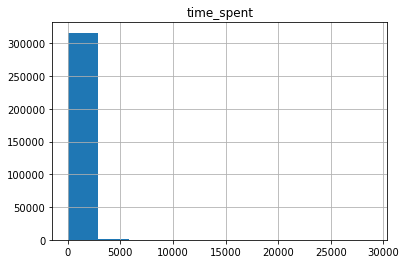

In [19]:
import pandas as pd

data = pd.read_csv ('..//datasets/visits.csv', sep='\t')

data.hist('time_spent')


Почти все значения собраны в одном столбце. По такой гистограмме особо ничего не скажешь


### Задача 2/3
Выведите гистограмму значений времени, проведённого на АЗС, с увеличенным до 100 числом столбцов
>Укажите число корзин, равное 100

array([[<AxesSubplot:title={'center':'time_spent'}>]], dtype=object)

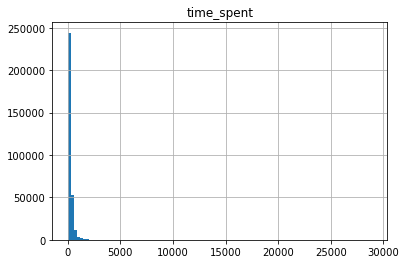

In [20]:
data.hist('time_spent', bins=100)

Значительную часть гистограммы занимают близкие к нулю значения. Это выбросы?


### Задача 3/3
Выведите гистограмму значений времени, проведённого на АЗС, с увеличенным до 100 числом столбцов и диапазоном значений от 0 до 1500.
>Добавьте параметр range, передав в круглых скобках наибольшее и наименьшее значения

array([[<AxesSubplot:title={'center':'time_spent'}>]], dtype=object)

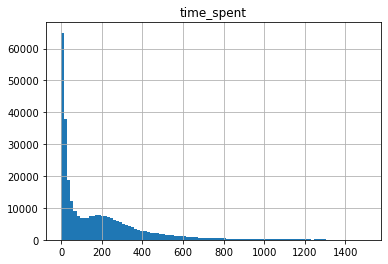

In [21]:
data.hist('time_spent', bins=100, range = (0, 1500))

Мощный узкий пик около 0 секунд. Широкий пик около 200 секунд. Очень мало значений после 1000 секунда, но отдельные выбросы были и до 30000 секунд.
Как интерпретировать эти данные?

<a name="7">_</a>
## Гистограмма для двух кубиков
Аналитик должен представлять себе гистограмму ожидаемого вида, чтобы знать, когда стоит насторожиться. Для некоторых явлений можно выяснить все возможные значения и описать частоту их появления — это называется **распределение**.

Отвлекитесь от задачи про АЗС и пофантазируйте. Представьте два игральных кубика с шестью гранями. Мысленно подбросьте их пару.

Единственная комбинация, дающая 12 очков в сумме — это две шестёрки. А 8 можно получить разными способами: 2 и 6; 3 и 5; 4 и 4. Из-за того, что таких наборов больше, получить восьмёрку более вероятно, чем 12.
Теперь представьте, как подкидываете пару кубиков не один, а 1000 раз! Какие комбинации получатся тогда? Не бойтесь сложных задач — всё возможно, когда есть воображение.

Если вам недостаёт фантазии или умения держать 1000 чисел в голове одновременно, напишите функцию в Python. Она выдаст все возможные комбинации с их частотой, по ним-то вы и построите гистограмму.

Для генерации случайных чисел в Python вызывают библиотеку `random` (англ. «случайный»):

In [22]:
import random

Функция `random.randint()` (от англ. random integer, «случайное целое число») возвращает случайные целые числа. Она принимает два аргумента: самое маленькое и самое большое допустимое число. Посмотрим, как она работает:

In [23]:
    print(random.randint(1, 5))
    print(random.randint(1, 5))
    print(random.randint(1, 5))
    print(random.randint(1, 5))
    print(random.randint(1, 5))

1
1
5
1
2


Распечатанные результаты работы функции выдали нам пять случайных чисел от 1 до 5. Однако вернёмся к кубикам. Эта же функция для диапазона от 1 до 6 будет имитировать результат броска кубика:

In [24]:
# от англ. score - очки
score = random.randint(1, 6)

Напишем функцию, возвращающую случайное число точек на верхней грани:

In [25]:
# от англ. dice - кубик, roll - бросок
def dice_roll():
    score = random.randint(1, 6)
    return score

print(dice_roll())
print(dice_roll())
print(dice_roll())

4
5
4


У нас пара кубиков. Значит, нужна функция, получающая количество очков от броска двух кубиков:

In [26]:
# от англ. double - двойной, roll - бросок, score - очки
def double_roll_score():
    first = dice_roll()
    second = dice_roll()
    score = first + second
    return score


print(double_roll_score())
print(double_roll_score())
print(double_roll_score())

5
8
7


Сделаем 1000 таких бросков и построим гистограмму полученных очков:

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

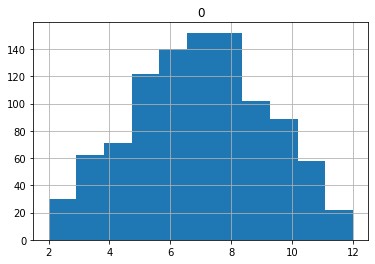

In [27]:
import pandas as pd

# Cоздаём пустой список. В него мы
# будем складывать результаты экспериментов.
experiments = []
for i in range(1000):
        score = double_roll_score()
        # Напомним: функция append() добавляет новый
        # элемент score в конец списка experiments.
        experiments.append(score)

df_experiments = pd.DataFrame(experiments)
df_experiments.hist(bins=11, range=(2, 12))

Интересно, такая гистограмма описывает только броски кубиков или характерна для других явлений?

### Задача 1/2
Будем бросать на стол 10 монет и считать количество выпавших орлов. Функции для имитации одного броска и подсчёта числа орлов в нескольких бросках уже в прекоде. Мы повторили эксперимент 1000 раз и сохранили результат в переменной `df_experiments`.

Постройте гистограмму полученных значений с диапазоном значений от 0 до 10 и количеством корзин 11.
>Примените метод` hist()` к датафрейму `df_experiments`. Параметру `bins` передайте 11, параметру `range` — (0, 10)

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

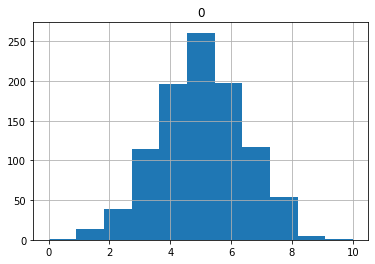

In [28]:
import random
import pandas as pd

# Функция, имитирующая один бросок монеты.
# От англ. coin - монета, flip - бросок монеты.
def coin_flip():
    # возможны два варианта:
    # - выпала решка, это +0 орлов
    # - выпал орёл, это +1 орёл
    score = random.randint(0, 1)
    return score

# Функция для суммирования числа орлов в нескольких бросках.
# Орёл и решка переводятся на английский как heads и tails.
# Аргумент repeat говорит, сколько раз бросать монету
# (от англ. repeat - повторение).
def flips_heads(repeat):
    total = 0
    for i in range(repeat):
        flip = coin_flip()
        total += flip
    return total

# Cоздаём пустой список. В него мы
# будем складывать результаты экспериментов.
experiments = []

for i in range(1000):
    score = flips_heads(10)

    # Напомним: функция append() добавляет новый
    # элемент score в конец списка experiments.
    experiments.append(score)

# превращаем список в DataFrame
df_experiments = pd.DataFrame(experiments)

df_experiments.hist(bins=11, range = (0, 10))

Чаще всего выпадает 5 орлов и совсем редко - 10 и 0.

### Задача 2/2
Валерик каждый день едет на работу с тремя пересадками: сперва на автобусе до метро; затем по одной ветке, а потом по другой; и от метро добирается до работы на автобусе. Валерик знает, сколько продолжается поездка на каждом виде транспорта и пересадки, но вечно забывает учесть ожидание автобусов и поездов. Постройте гистограмму опозданий Валерика за 5 лет c параметром bins=10.
Будем считать, что автобус прибывает за время от 0 до 10 минут, а поезд — за время от 0 до 5 минут. В прекоде мы уже написали функции, которые это имитируют.
>Такой код создаст список опозданий:

`days = []
for i in range(365 * 5):
        delay = total_delay()
        days.append(delay)`

In [29]:
# прекод

import random
import pandas as pd

# Функция, имитирующая время ожидания автобуса.
# (от англ. bus - автобус, wait - ждать, time - время)
def bus_wait_time():
    return random.randint(0, 10)

# Функция, имитирующая время ожидания поезда в метро.
# (от англ. train - поезд, wait - ждать, time - время)
def train_wait_time():
    return random.randint(0, 5)

# Функция подсчёта полного опоздания за день.
# от англ. total - полный, итоговый, delay - задержка, опоздание
def total_delay():
    # обратите внимание, как в Python переносят длинные строки
    return (
        bus_wait_time()
        + train_wait_time()
        + train_wait_time()
        + bus_wait_time()
    )

# создайте пустой список
days = 

for i in range(365 * 5):
    delay = total_delay()

    # добавьте опоздание в список days
    
# превращаем список в DataFrame
df_days = pd.DataFrame(days)

# постройте гистограмму для df_days


SyntaxError: invalid syntax (<ipython-input-29-a456f58f6c8f>, line 28)

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

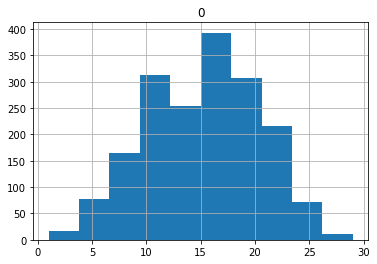

In [30]:
import random
import pandas as pd

# Функция, имитирующая время ожидания автобуса.
# (от англ. bus - автобус, wait - ждать, time - время)
def bus_wait_time():
    return random.randint(0, 10)

# Функция, имитирующая время ожидания поезда в метро.
# (от англ. train - поезд, wait - ждать, time - время)
def train_wait_time():
    return random.randint(0, 5)

# Функция подсчёта полного опоздания за день.
# от англ. total - полный, итоговый, delay - задержка, опоздание
def total_delay():
    # обратите внимание, как в Python переносят длинные строки
    return (bus_wait_time() + 
            train_wait_time() + 
            train_wait_time() + 
            bus_wait_time())

# создайте пустой список
days = [] # < напишите код здесь >

for i in range(365 * 5):
    delay = total_delay()
    # добавьте опоздание в список days
    days.append(delay)

# превращаем список в DataFrame
df_days = pd.DataFrame(days)

# постройте гистограмму для df_days
df_days.hist(bins=10) 

В среднем Валерик опаздывает на 15 минут, однако бывает, что и на полчаса

<a name="8">_</a>
## Распределения
Взгляните ещё раз на гистограммы кубиков, орлов и опозданий Валерика. Из-за того, что функция подбора случайных чисел каждый раз работает по-разному, ваши гистограммы могут немного отличаться от тех, которые вы сейчас увидите.
Гистограмма суммы очков при броске пары кубиков:

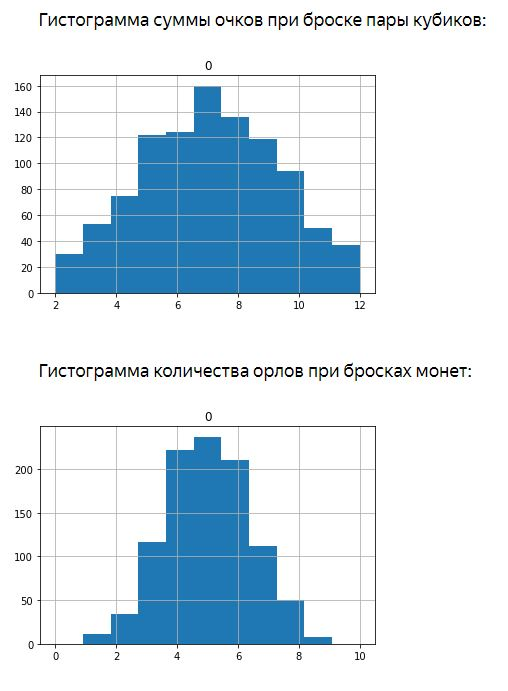

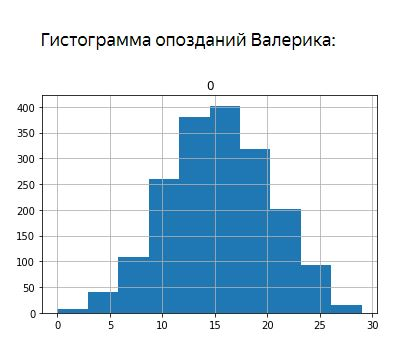

Наиболее частые (типичные, нормальные) значения оказываются посередине. А редкие — по краям. График симметричен и напоминает колокол. Такое распределение называется **нормальное**.
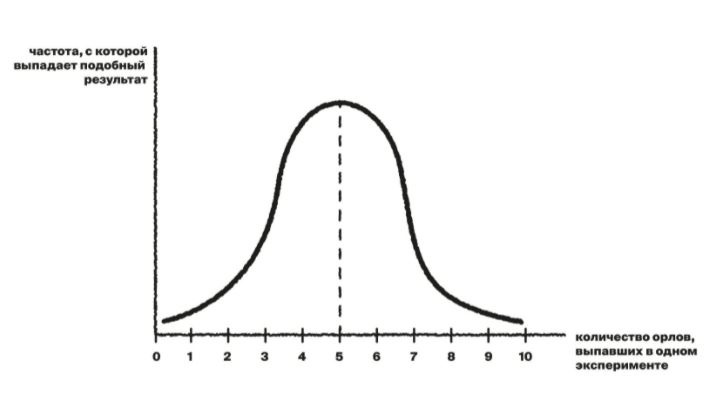

Нормальные или тяготеющие к ним распределения распространены в жизни. Так распределяется рост людей, размер яблок, результаты измерения температуры. Понимание природы распределений необходимо для обнаружения важных аномалий.

Так, измеряя длину изготовленных на заводе деталей, мы ожидаем распределение, тяготеющее к нормальному. Если же в результате расчётов получили распределение, скажем, с двумя пиками, это должно насторожить аналитика. Такое может быть, если на заводе есть две производственные линии, и с одной из них приходят данные в сантиметрах, а с другой — в метрах.

В общем случае любое отклонение от ожидаемого распределения — это сигнал, что данные не в порядке.

Ещё одно распределение, которое часто встречается — распределение Пуассона. Оно описывает число событий в единицу времени.
Например, в среднем в магазин заходит 2 человека в минуту. Но это не значит, что каждую минуту заходит ровно 2 человека. Может, в эту минуту не зайдёт ни одного, а через минуту зайдёт 5. Если каждый посетитель заходит случайным образом, независимо от других — это и есть распределение Пуассона:
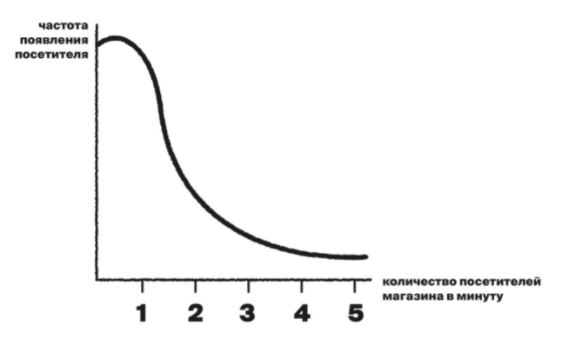

Форма распределения Пуассона зависит от числа событий. При небольших значениях распределение смещено влево, а с увеличением числа событий становится симметричным и уходит вправо.

Невозможно получить отрицательное число заходов в магазин, но при небольшом потоке посетителей есть шанс, что в определённую минуту придут 5 посетителей или не придёт ни одного. В таком случае распределение Пуассона обрезано на нуле и имеет длинный «хвост» в положительную сторону. При увеличении числа посетителей шанс не получить ни одного захода в магазин уже почти не реализуется, поэтому распределение Пуассона становится симметричным и стремится к нормальному.
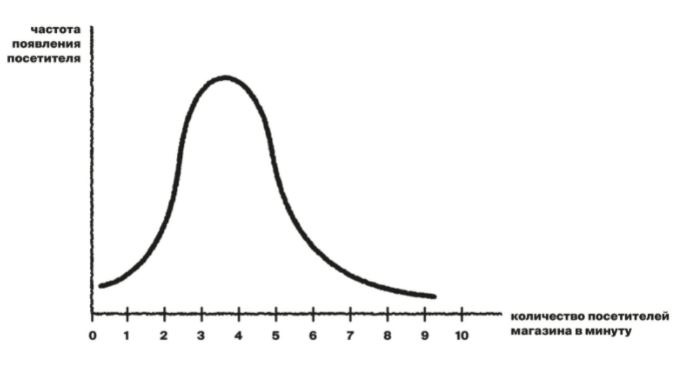

<a name="9">_</a>
## Диаграмма размаха
Вспомним распределение времени на АЗС, которое мы получили в уроке 3.

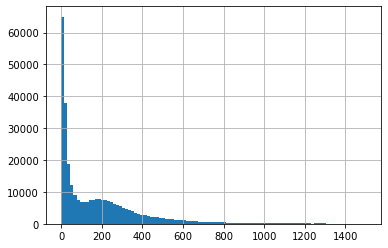

In [31]:
data['time_spent'].hist(bins=100, range=(0, 1500));

Как вы интерпретируете данное распределение?
- Всё ожидаемо, есть пик на малых временах и длинный хвост на больших
- **Странно, что есть пик около 0**

Ожидаемое распределение времени заправки — гистограмма с длинным хвостом на высоких значениях и падением в ноль слева от пика, не доходя до нулевого времени заправки. Однако на графике виден высокий пик около 0. Скорее всего, он имеет иную природу. Это не заправки, а ошибки расчётов, проезды сквозь АЗС или что-то ещё.

Описывая распределение, аналитики рассчитывают среднее арифметическое или медиану. С соответствующими методами mean() и median() вы познакомились в курсе по предобработке данных. Однако помимо медианы и среднего, важно знать характерный разброс — то, какие значения оказались вдали от среднего, и насколько их много.

Самое простое, что можно посчитать для оценки разброса — это минимальное и максимальное значения. Такое описание не всегда точно, подвержено влиянию выбросов. Гораздо более устойчивая оценка — **межквартильный размах**.

**Квартили** (от латинского quartus — «четвёртый») разбивают упорядоченный набор данных на четыре части. Первый квартиль Q1 — число, отделяющее первую четверть выборки: 25% элементов меньше, а 75% — больше него. Медиана — второй квартиль Q2, половина элементов больше и половина меньше неё. Третий квартиль Q3 — это отсечка трёх четвертей: 75% элементов меньше и 25% элементов больше него. Межквартильный размах — это расстояние между Q1 и Q3.
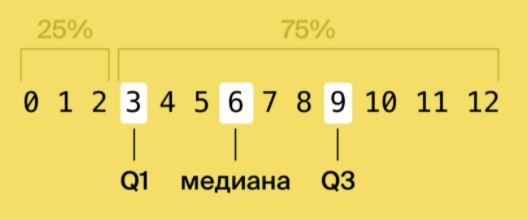

Чему равна Q1 в выборке из пяти значений 1, 6, 10, 25, 100?
- 1
- **6**
- 3
- 8
- 10

Увидеть медиану и квартили в Python можно на специальном графике. Его называют **диаграмма размаха** или **ящик с усами**.
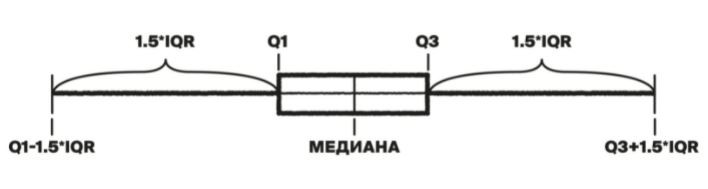
«Ящик» ограничен первым и третьим квартилями. Внутри ящика обозначают медиану.

«Усы» простираются влево и вправо от границ ящика на расстояние, равное 1,5 межквартильным размахам (сокращённо IQR, от англ. interquartile range, «межквартильный размах»). В размах «усов» попадают нормальные значения, а за пределами находятся выбросы, изображённые точками. Если правый «ус» длиннее максимума, то он заканчивается максимумом. То же — для минимума и левого уса.
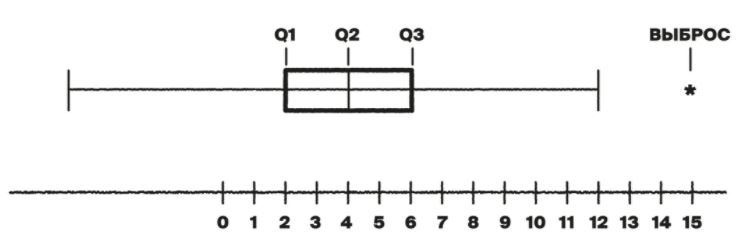

<a name="10">_</a>
## Диаграмма размаха в Python
В Python диаграмму размаха строят методом `boxplot()` (от англ. box and whisker plot — «ящик с усами»).

Посмотрим, как выглядит график для данных задачи про АЗС:

<AxesSubplot:>

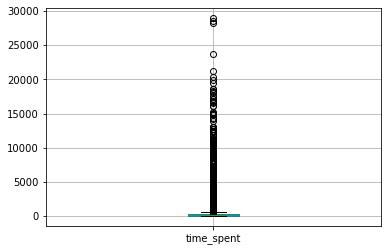

In [32]:
data.boxplot()

Не очень наглядно. Видно, что есть выбросы, и многие почти до 30000 секунд, однако на этом всё. Чтобы лучше разглядеть «ящик с усами», изменим масштаб графика.

Для продвинутой работы с графиками (в том числе гистограммами), импортируют библиотеку `matplotlib` (от англ. math — «математический», plot — «график, диаграмма», library — «библиотека»). Желая построить график, обращаются к методам Pandas, а он, в свою очередь, передаёт данные `matplotlib`. Pandas при вызове функций рисования возвращает оси графика. Ими можно управлять, задавая ограничения на оси абсцисс (x) и оси ординат (y). Применим метод `ylim(y_min, y_max)` (от англ. y-limits, «пределы по оси ординат») для изменения масштаба по вертикальной оси. Если требуется поменять масштаб по горизонтальной оси, вызывают метод `xlim (x_min, x_max)` (от англ. х-limits, «пределы по оси абсцисс»). Оба метода имеют 2 аргумента: минимальное и максимальное желаемое значение для графика; а сам метод вызывают из библиотеки `plt`:

(0.0, 200.0)

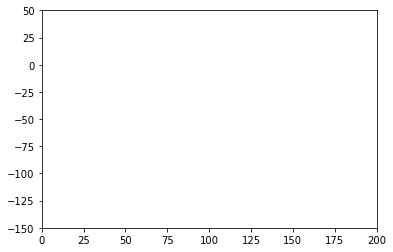

In [36]:
import matplotlib.pyplot as plt 

plt.ylim(-150, 50)
plt.xlim(0, 200)

`boxplot()` позволяет визуально оценить характеристики распределения, не прибегая к гистограмме. Удобно, когда нужно сравнить разные выборки.

### Задача
Нарисуйте диаграмму размаха для data, ограничив диапазон по вертикали значениями -100 и 1000.
>Вызовите метод `ylim()` из библиотеки `plt`. Передайте нижнюю и верхнюю границы

(-100.0, 1000.0)

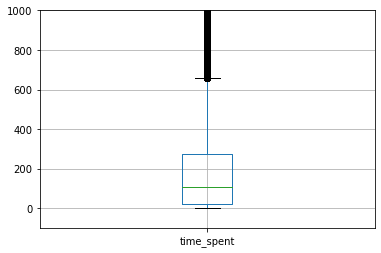

In [38]:
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv ('..//datasets/visits.csv', sep='\t')
data.boxplot()
plt.ylim(-100, 1000)

Мы видим, что большая часть значений лежит в диапазоне до 300 секунд, что выглядит правдоподобно. Но при этом 1 квартиль лежит на уровне менее 50 секунд, а это подозрительно.


<a name="11">_</a>
## Описание данных
Сравните повёрнутую набок гистограмму и ящик с усами из прошлого урока. Найдите медиану и квартили; внимательно изучите усы.

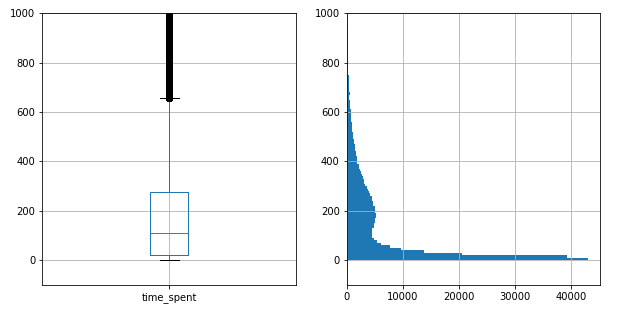
Нижний «ус» упирается в 0, минимальное значение. Верхний заканчивается около 650 секунд — это 1.5 межквартильного размаха, добавленного к 3-му квартилю. Это ориентировочная граница нормального размаха. Всё, что лежит за ней, считается выбросом. Более высокие значения рисуются отдельными точками, но сливаются в единую жирную линию: таких выбросов у нас очень много.
И всё же значения, которые отсёк верхний «ус» — редкие. Видно, насколько медиана (зелёная линия) не стремится к длинному хвосту высоких значений.

Заметные на гистограмме нюансы распределения хорошо бы зафиксировать в числах: иметь под рукой среднее, медиану, количество наблюдений в выборке и разброс их значений. Такие характеристики, дающие представление о выборке, входят в числовое описание данных. В Python его получают методом describe() (англ. «описать, охарактеризовать»). Результат отработки метода — список характерных значений:

In [39]:
data.describe()

,time_spent
count,317104.000000
mean,203.382294
std,395.754791
min,0.000000
25%,19.000000
50%,108.000000
75%,274.000000
max,28925.000000


Описание данных может быть не только дополнением к графикам, но и самодостаточной боевой единицей первичного анализа. Если в данных много столбцов, или нужно сравнить несколько выборок, аналитики обращаются к числовому описанию, а не к графикам.

**Стандартное отклонение** — единственное значение, которого мы ещё не касались. Оно характеризует разброс величин, показывает, насколько значения в выборке отличаются от среднего арифметического.

Бывает, что именно стандартное отклонение позволяет понять природу распределения и определить, насколько значения однородны. Выборка, где все значения близки к среднему, будет охарактеризована малым стандартным отклонением. Если же стандартное отклонение велико, в наборе данных могут быть серьёзные аномалии или выбросы.

К примеру, проанализируем успеваемость двух учеников. Вот списки характерных значений школьных оценок того и другого:

Средний балл у обоих 4,09. Если исходить только из него, кажется, что Виктор с Иваном получают примерно похожие отметки да и учатся, скорее всего, одинаково.

Но посмотрите на стандартное отклонение — 0,7 у Виктора и 1,4 у Ивана. В два раза больше! Судя по стандартному отклонению, успеваемость у них распределяется по-разному. Оценки Виктора тяготеют к четвёрке, тогда как у Ивана отклонение от среднего столь велико, что четвёрок он мог и не получать. Изучим классный журнал:

Мы оказались правы! Виктор в основном получал четвёрки, и время от времени — тройки и пятёрки. Иван же знал предмет на отлично, внезапно превратился в двоечника, а «среднюю» четвёрку получал только раз. Это повод для отдельного исследования: что стряслось с Иваном? Он влюбился, попал в плохую компанию или просто заскучал?

### Задача
Методом `describe()` получите характерные значения таблицы data. Результат выведите на экран.

In [40]:
data = pd.read_csv ('../datasets/visits.csv', sep='\t')
print(data.describe())

          time_spent
count  317104.000000
mean      203.382294
std       395.754791
min         0.000000
25%        19.000000
50%       108.000000
75%       274.000000
max     28925.000000


Обратите внимание, что среднее почти в 2 раза больше медианы. Это говорит о том,  что в распределении длинный хвост высоких значений (или несколько очень больших значений), влияющих на среднее, но не на медиану.


<a name="12">_</a>
## Заключение
В этой теме вы узнали, что такое распределение, познакомились с базовой проверкой данных, научились строить гистограммы. Они понадобятся ещё не раз там, где исследование даст неожиданные результаты.

Вы сильно продвинулись в решении поставленной бизнесом задачи: сколько времени тратят водители на АЗС. Уже рассчитали среднюю продолжительность заправки методом pivot_table(), проверили распределение числа заездов по сетям станций и распечатали топ-10 с наибольшим заездом. Сколько всего! Но самое важное — научились проверять данные и расчёты на правдоподобность и находить неочевидные аномалии. В этом заслуга вас и распределений.

Раз добрались до аномалий, пора взять на вооружение срез данных. Что это такое — в следующей теме.



Где ещё почитать про гистограммы, ящик с усами и описательную статистику:

- <a href="https://habr.com/ru/company/ods/blog/323210/">Гистограммы</a> 
- <a href="http://statistica.ru/theory/opisatelnye-statistiki/">Описательные статистики: среднее, медиана, стандартное отклонение, перцентили</a> 
- <a href="http://datareview.info/article/svodnyie-tablitsyi-v-python/">Сводные таблицы</a>